# Read and calculate JER from the text files

In [1]:
# {2    JetEta    Rho    1    JetPt    sqrt([0]*abs([0])/(x*x)+[1]*[1]*pow(x,[3])+[2]*[2])    Resolution}

In [137]:
import pandas as pd
import numpy as np
import mplhep as hep
hep.style.use("CMS")

In [4]:
filename = "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt"

In [ ]:
with filename open as f:
    lines = f.readlines()
    

In [25]:
df = pd.read_csv( "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt", delimiter='\s+', skiprows = 1, names = ['eta_low','eta_high', 'rho_low', 'rho_high', 'unknown','pt_low','pt_high','par0','par1','par2','par3'])

In [28]:
df.head(20)

,eta_low,eta_high,rho_low,rho_high,unknown,pt_low,pt_high,par0,par1,par2,par3
0,-4.7,-3.2,0.00,7.47,6,15,3000,1.681,0.997700,1.048000e-01,-1.24700
1,-4.7,-3.2,7.47,13.49,6,15,3000,3.372,0.327000,9.034000e-02,-0.62540
2,-4.7,-3.2,13.49,19.52,6,15,3000,4.246,0.197400,6.925000e-05,-0.22270
3,-4.7,-3.2,19.52,25.54,6,15,3000,4.608,0.494700,1.052000e-01,-0.94170
4,-4.7,-3.2,25.54,31.57,6,15,3000,5.302,0.191000,1.053000e-05,-0.20450
5,-4.7,-3.2,31.57,37.59,6,15,3000,5.770,0.176000,5.612000e-05,-0.16240
6,-4.7,-3.2,37.59,90.00,6,15,3000,6.191,0.164100,2.126000e-05,-0.13640
7,-3.2,-3.0,0.00,7.47,6,15,3000,-52.900,52.820000,1.559000e-01,-1.99500
8,-3.2,-3.0,7.47,13.49,6,15,3000,4.069,1.732000,1.497000e-01,-1.29800
9,-3.2,-3.0,13.49,19.52,6,15,3000,6.729,0.254300,2.261000e-02,-0.19270


In [75]:
def compute_jer(df, i_row):
    p0 = df["par0"][i_row]
    p1 = df["par1"][i_row]
    p2 = df["par2"][i_row]
    p3 = df["par3"][i_row]
    #print(p0,p1,p2,p3,end = "\n")
    x = np.abs(np.mean(df["pt_low"][i_row]+df["pt_high"][i_row]))
    
    
    #print(p0*np.abs(p0)/(x*x)+p1*p1*np.power(x,p3) + p2*p2)
    return np.sqrt(p0*np.abs(p0)/(x*x)+p1*p1*np.power(x,p3) + p2*p2)

In [76]:
jer = []
for i in range(len(df)):
    r = compute_jer(df,i)
    jer.append(r)


In [54]:
i_row = 20
x = np.abs(np.mean(df["eta_low"][i_row]+df["eta_high"][i_row]))
p0 = df["par0"][i_row]
p1 = df["par1"][i_row]
p2 = df["par2"][i_row]
p3 = df["par3"][i_row]

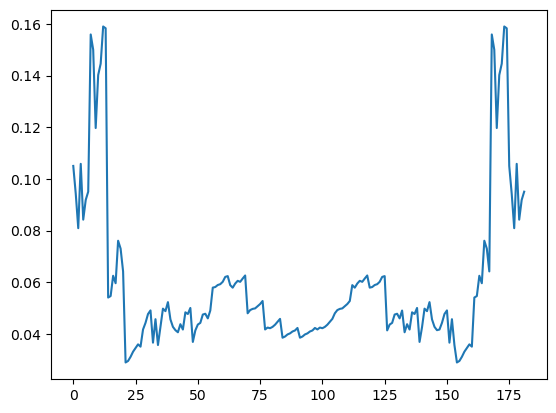

In [79]:
import matplotlib.pyplot as plt
plt.plot(jer)

In [87]:
df["JER"] = np.array(jer)
df.head(30)

,eta_low,eta_high,rho_low,rho_high,unknown,pt_low,pt_high,par0,par1,par2,par3,JER
0,-4.7,-3.2,0.00,7.47,6,15,3000,1.681,0.997700,1.048000e-01,-1.24700,0.105019
1,-4.7,-3.2,7.47,13.49,6,15,3000,3.372,0.327000,9.034000e-02,-0.62540,0.094211
2,-4.7,-3.2,13.49,19.52,6,15,3000,4.246,0.197400,6.925000e-05,-0.22270,0.080909
3,-4.7,-3.2,19.52,25.54,6,15,3000,4.608,0.494700,1.052000e-01,-0.94170,0.105825
4,-4.7,-3.2,25.54,31.57,6,15,3000,5.302,0.191000,1.053000e-05,-0.20450,0.084211
5,-4.7,-3.2,31.57,37.59,6,15,3000,5.770,0.176000,5.612000e-05,-0.16240,0.091852
6,-4.7,-3.2,37.59,90.00,6,15,3000,6.191,0.164100,2.126000e-05,-0.13640,0.095044
7,-3.2,-3.0,0.00,7.47,6,15,3000,-52.900,52.820000,1.559000e-01,-1.99500,0.155937
8,-3.2,-3.0,7.47,13.49,6,15,3000,4.069,1.732000,1.497000e-01,-1.29800,0.150011
9,-3.2,-3.0,13.49,19.52,6,15,3000,6.729,0.254300,2.261000e-02,-0.19270,0.119697


In [107]:
df = pd.read_csv( "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt", delimiter='\s+', skiprows = 1, names = ['eta_low','eta_high', 'rho_low', 'rho_high', 'unknown','pt_low','pt_high','par0','par1','par2','par3'])

In [108]:
rho = 14
eta = -3
df = df[ (eta > df['eta_low']) &  (eta <= df['eta_high']) & (rho > df['rho_low']) & (rho <= df['rho_high'])  ]

In [109]:
df

,eta_low,eta_high,rho_low,rho_high,unknown,pt_low,pt_high,par0,par1,par2,par3
9,-3.2,-3.0,13.49,19.52,6,15,3000,6.729,0.2543,0.02261,-0.1927


In [162]:
import pandas as pd
def computeJER(pt, eta, rho, df):
    df = df[ (eta > df['eta_low']) &  (eta <= df['eta_high']) & (rho > df['rho_low']) & (rho <= df['rho_high'])  ]
    p0 = df['par0']
    p1 = df['par1']
    p2 = df['par2']
    p3 = df['par3']
    x = pt
    return np.sqrt(p0*np.abs(p0)/(x*x)+p1*p1*np.power(x,p3) + p2*p2)
df = pd.read_csv( "Summer19UL18_JRV2_MC_PtResolution_AK4PFchs.txt", delimiter='\s+', skiprows = 1, names = ['eta_low','eta_high', 'rho_low', 'rho_high', 'unknown','pt_low','pt_high','par0','par1','par2','par3'])

computeJER(200, -1.2, 14,df )

65    0.099872
dtype: float64

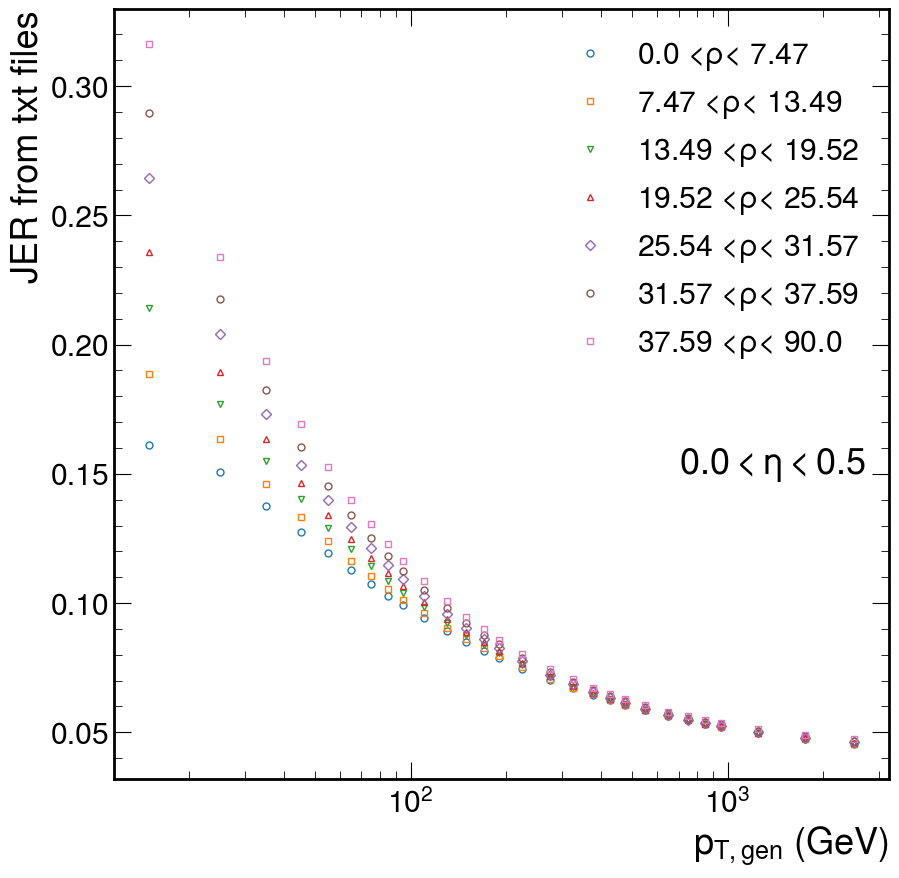

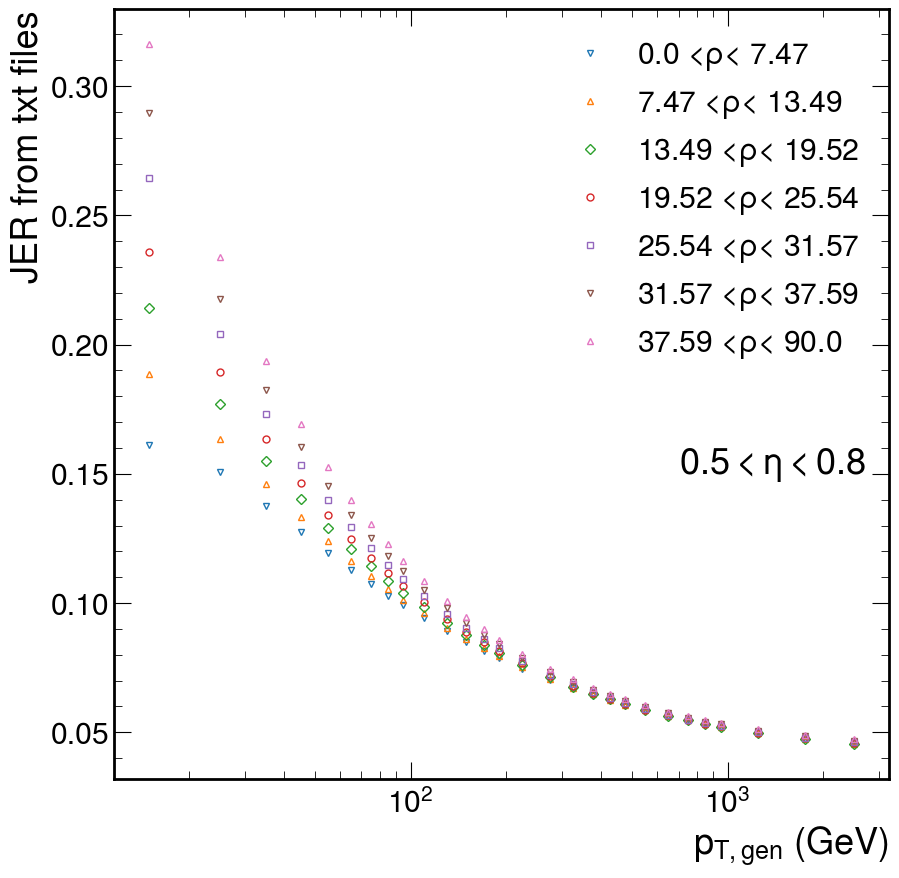

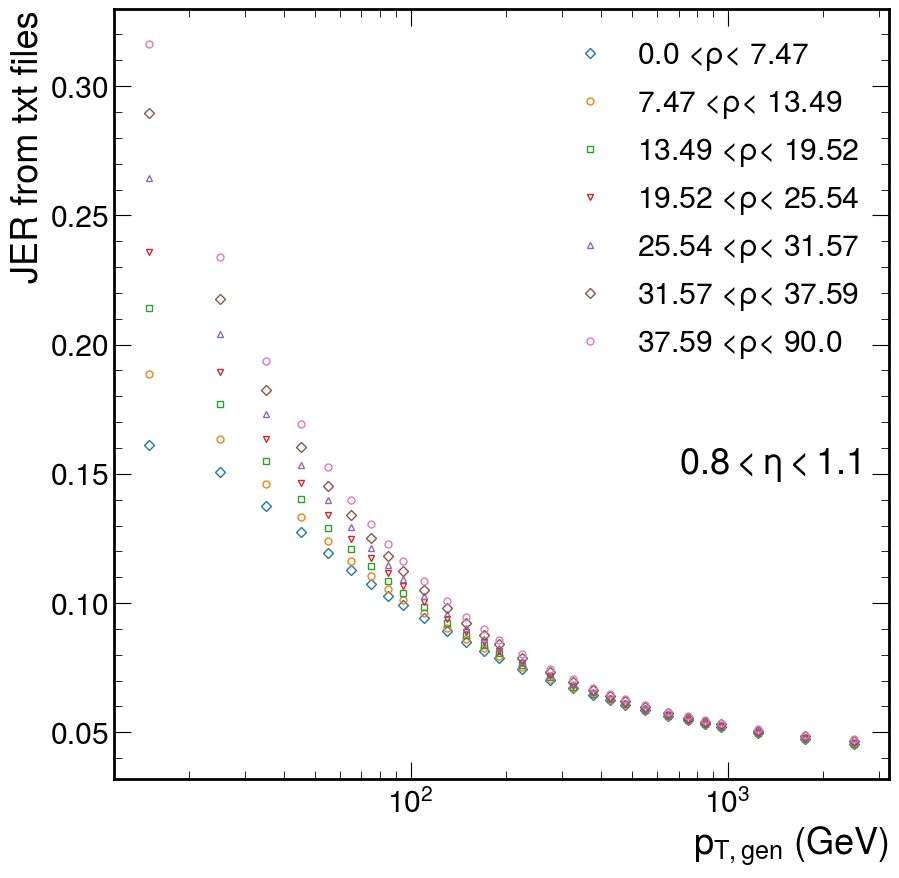

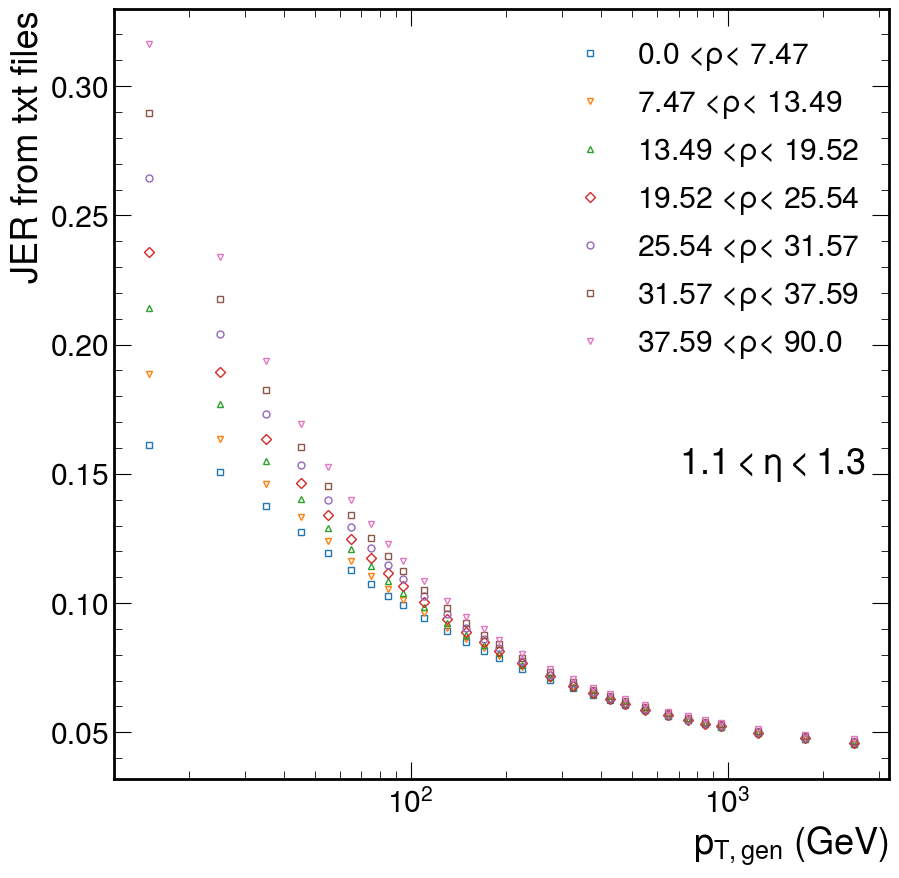

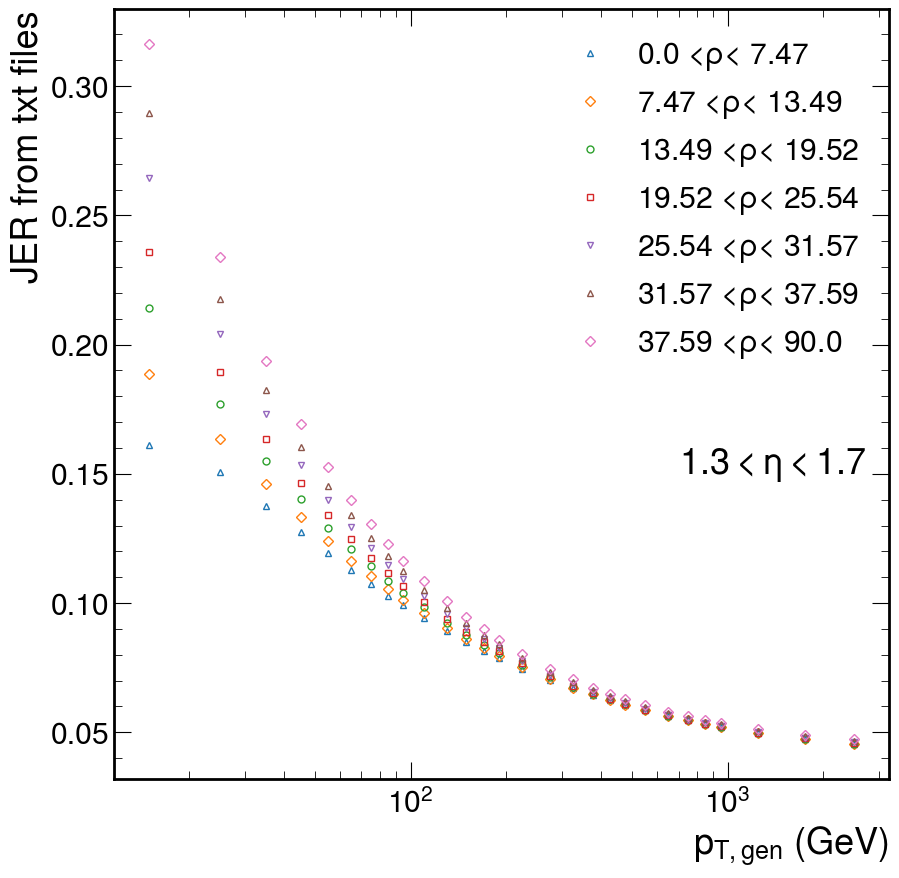

In [163]:
ptlist = [  15.,   25.,   35.,   45.,   55.,   65.,   75.,   85.,   95.,
        110.,  130.,  150.,  170.,  190.,  225.,  275.,  325.,  375.,
        425.,  475.,  550.,  650.,  750.,  850.,  950., 1250., 1750.,
       2500.]

etalist = np.array([0.25, 0.65, 0.95, 1.2 , 1.5 , 1.8 , 2.  , 2.2 , 2.4 , 2.65, 2.9 ,
       3.1 , 3.95])

rholist = [ 3.735, 10.48 , 16.505, 22.53 , 28.555, 34.58 , 63.795]
eta_bins = np.array([0. , 0.5, 0.8, 1.1, 1.3, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3. , 3.2,
       4.7])
rho_bins = np.array([ 0.  ,  7.47, 13.49, 19.52, 25.54, 31.57, 37.59, 90.  ])
import itertools
markers = itertools.cycle(['o', 's', 'v', '^', 'D'])

eta = -1.2
rho = 14
for i_eta in range(5):
    for i_rho, rho in enumerate(rholist):
        plt.errorbar(x = ptlist, y = [computeJER(pt = pt,eta = 0,rho = rho,df = df) for pt in ptlist], fmt = next(markers) ,
                 label = str(round(rho_bins[i_rho],2))+r" <$\rho$< "  + str(round(rho_bins[i_rho+1],2)),linestyle = "", markersize = 5, markerfacecolor='none')
    plt.xlabel(r"$p_{T,gen}$ (GeV)")
    plt.ylabel("JER from txt files")
    plt.xscale('log')
    plt.legend()
    plt.text(700, 0.15, str(round(eta_bins[i_eta],1))+r'$ <\eta< $'+str(round(eta_bins[i_eta+1],1)))
    plt.show()

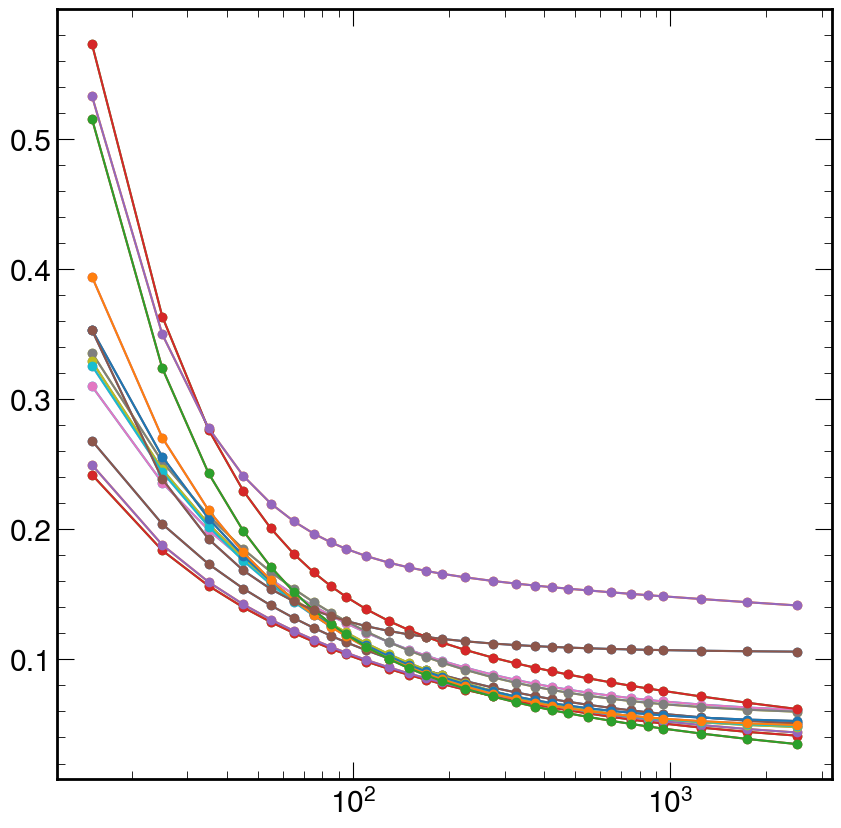

In [138]:
for eta in etalist:
    plt.plot(ptlist, [computeJER(pt = pt,eta = eta,rho = 20 ,df = df) for pt in ptlist], marker = 'o')
    
plt.xscale('log')

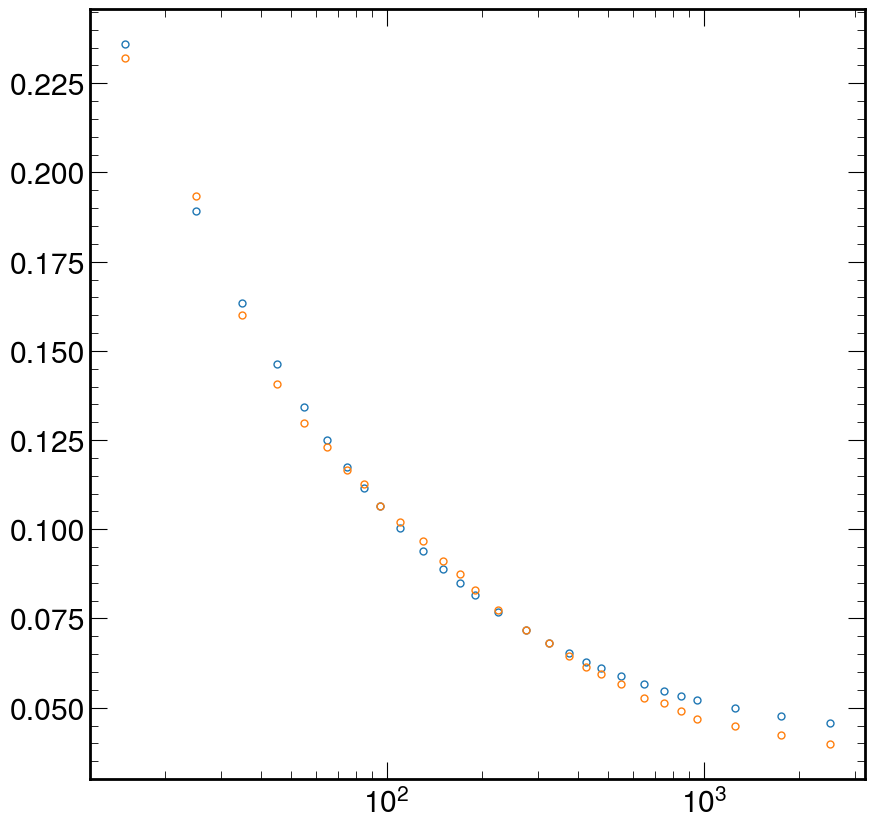

In [164]:
plt.errorbar(x = ptlist, y = [computeJER(pt = pt,eta = 0.1,rho = 20,df = df) for pt in ptlist], fmt = next(markers) ,
                 label = str(round(rho_bins[i_rho],2))+r" <$\rho$< "  + str(round(rho_bins[i_rho+1],2)),linestyle = "", markersize = 5, markerfacecolor='none')
plt.errorbar(x = ptlist, y = [0.23210282585806, 0.19348243895994344 ,0.16008863770828463,
 0.14063614836960409, 0.1296471627062042 ,0.12300759464643889,
 0.11665817805978422 ,0.11261959281884888, 0.10643310500088855,
 0.10208945493489119, 0.09657795083903106 ,0.09113779618968906,
 0.08746887124147604, 0.0829058240263365, 0.07745816360545586,
 0.07190327979686205, 0.06821509848993983, 0.06438105768769327,
 0.061329191125631316, 0.05937359208945775 ,0.056607101902447554,
 0.052760057449254334, 0.05118395502230111, 0.04909953313030032,
 0.04688401759927869, 0.04479564756510842, 0.04236561200481317,
 0.039797055262320434]  ,
                 label = str(round(rho_bins[i_rho],2))+r" <$\rho$< "  + str(round(rho_bins[i_rho+1],2)),linestyle = "", markersize = 5, markerfacecolor='none', marker ='o')

plt.xscale('log')

In [ ]:
from utils import *


jerfiles = ["Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt", "Summer19UL17_JRV2_MC_PtResolution_AK4PFchs.txt","Summer19UL18_JRV2_MC_PtResolution_AK4PFchs.txt"
            "Summer20UL16APV_JRV3_MC_PtResolution_AK4PFchs.txt"]
jerfile =
jerfile = 

plt.errorbar(x = pt_values, y = [computeJER(pt = pt,eta = 0.2,rho = 20, filename = jerfile) for pt in pt_values], fmt = next(markers) ,
                 label = "From txt file",linestyle = "", markersize = 5, markerfacecolor='none')